## Observations and Insights

1. Only Capomulin produced a marked decrease in tumor volume (≈20%), while other treatments saw similarly paced tumor growth (≈50%) throughout treatment.
2. All drug samples saw increases in metastatic sites throughout treatment, however both the Capomulin and Infubinol samples increased less quickly.
3. The Capomulin sample ended treatment with a survival rate over 80%, while the other samples ended their treatments with a survival rate under 50%.

## Dependencies and starter code

In [12]:
# Dependencies
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import numpy as np

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
merge_data = pd.merge(mouse_metadata, study_results, on = "Mouse ID", how = "outer")
# merge_data.head()

# Sort merged dataset by Tumor Volume to allow for median values to be correct
merge_data_sort = merge_data.sort_values(["Tumor Volume (mm3)"], ascending = True)
# merge_data_sort.head()

## Summary statistics

In [13]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Identify the diferrent Drug Regimen along with the total Tumor Volume for each using .groupby
regimen_grouped = merge_data_sort.groupby(["Drug Regimen"])
# regimen_grouped

# Create computation for the mean of each regimen
regimen_mean = regimen_grouped["Tumor Volume (mm3)"].mean()

# Create computation for the median of each regimen
regimen_median = regimen_grouped["Tumor Volume (mm3)"].median()

# Create computation for the variance of each regimen
regimen_variance = regimen_grouped["Tumor Volume (mm3)"].var()

# Create computation for the standard deviation of each regimen
regimen_std = regimen_grouped["Tumor Volume (mm3)"].std()

# Create computation for the SEM
regimen_sem = regimen_grouped["Tumor Volume (mm3)"].sem()

summary_stats = pd.DataFrame({"Mean": regimen_mean, "Median":regimen_median, "Variance":regimen_variance, "Standard Deviation": regimen_std, "SEM": regimen_sem})
summary_stats

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar plots

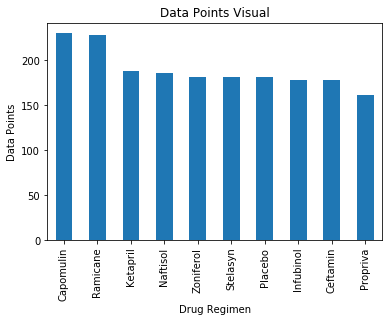

In [14]:
# .groupby Drug Regimen with .count and Mouse ID to determine the data points
regimen_data_points = merge_data.groupby(["Drug Regimen"]).count()["Mouse ID"]
# regimen_data_points

# Generate a bar plot showing number of data points for each treatment regimen using pandas
regimen_data_points.sort_values(ascending = False).plot(kind = "bar", figsize = (6,4))

# Set the box chart labels
plt.title("Data Points Visual")
plt.xlabel("Drug Regimen")
plt.ylabel("Data Points")

# Show the chart and format layout
plt.show()

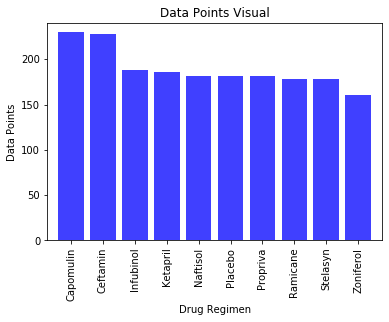

<Figure size 432x288 with 0 Axes>

In [15]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot

# Create an array with the datapoints
users = [230, 178, 178, 188, 186, 181, 161, 228, 181, 182]

# Sort in descending order
users.sort(reverse = True)

# Set the x-axis to be the amount of the Drug Regimen
x_axis = np.arange(len(regimen_data_points))

plt.bar(x_axis, users, color = 'b', alpha = 0.75, align = 'center')
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ['Capomulin', 'Ceftamin', 
                            'Infubinol', 'Ketapril', 
                            'Naftisol', 'Placebo', 
                            'Propriva', 'Ramicane', 
                            'Stelasyn', 'Zoniferol'], rotation = 'vertical')
plt.xlim(-0.75, len(x_axis) - 0.25)
plt.ylim(0, max(users) + 10)

# Set chart labels
plt.title("Data Points Visual")
plt.xlabel("Drug Regimen")
plt.ylabel("Data Points")

# Show chart and format layout
plt.show()
plt.tight_layout()

## Pie plots

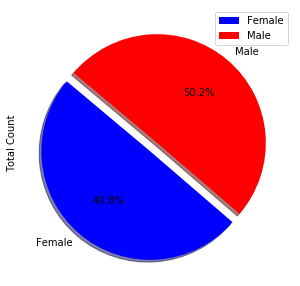

In [16]:
# .groupby Mouse ID and Sex to find the unique number of male VS female
groupby_gender = merge_data.groupby(["Mouse ID","Sex"])
# groupby_gender

mouse_gender_df = pd.DataFrame(groupby_gender.size())

# Create the dataframe with total count of Female and Male mice
mouse_gender = pd.DataFrame(mouse_gender_df.groupby(["Sex"]).count())
mouse_gender.columns = ["Total Count"]

# Create and format the percentage of female VS male
mouse_gender["Percentage of Sex"] = (100 * (mouse_gender["Total Count"] / mouse_gender["Total Count"].sum()))

# Format the "Percentage of Sex" column
mouse_gender["Percentage of Sex"] = mouse_gender["Percentage of Sex"]
# mouse_gender

# Generate a pie plot showing the distribution of female VS male mice using pandas
colors = ['blue', 'red']
explode = (0.1, 0)
plot = mouse_gender.plot.pie(y = 'Total Count',figsize = (5,5), colors = colors, startangle = 140, explode = explode, shadow = True, autopct = "%1.1f%%")

(-1.1879383453817904,
 1.111754351424799,
 -1.1987553745848882,
 1.1126035084692154)

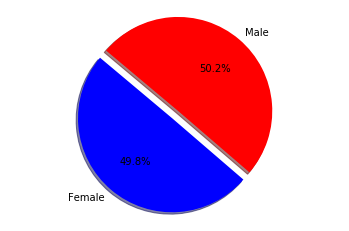

In [17]:
# Generate a pie plot showing the distribution of female VS male mice using pyplot

# Create Labels for the sections of the pie
labels = ["Female","Male"]

# List the values of each section of the pie chart
sizes = [49.799197,50.200803]

# Set colors for each section of the pie
colors = ['blue', 'red']

# Determine which section of the circle to explode
explode = (0.1, 0)

# Create the pie chart based upon the values 
plt.pie(sizes, explode = explode, labels = labels, colors = colors, autopct = "%1.1f%%", shadow = True, startangle = 140)

# Set equal axis
plt.axis("equal")

## Quartiles, outliers and boxplots

In [18]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers.
best_regimens = merge_data[merge_data["Drug Regimen"].isin(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])]
best_regimens = best_regimens.sort_values(["Drug Regimen", "Mouse ID", "Timepoint"], ascending = True)
# best_regimes

best_regimens_data = best_regimens[["Drug Regimen", "Mouse ID", "Timepoint", "Tumor Volume (mm3)"]]
best_regimens_data

,Drug Regimen,Mouse ID,Timepoint,Tumor Volume (mm3)
300,Capomulin,b128,0,45.000000
301,Capomulin,b128,5,45.651331
302,Capomulin,b128,10,43.270852
303,Capomulin,b128,15,43.784893
304,Capomulin,b128,20,42.731552
...,...,...,...,...
80,Ramicane,z578,25,37.414114
81,Ramicane,z578,30,37.815935
82,Ramicane,z578,35,38.504824
83,Ramicane,z578,40,34.022093


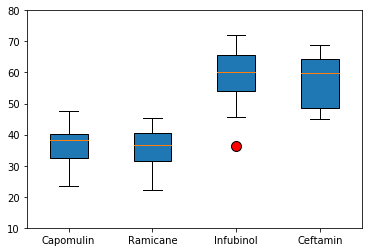

In [19]:
# .groupby Drug Regimen and Mouse ID to capture Last Tumor Measurement
best_regimens_sort = best_regimens_data.groupby(['Drug Regimen', 'Mouse ID']).last()['Tumor Volume (mm3)']
# best_regimens_sort.head()

# Turn retrieved data into dataframe
best_regimen_df = best_regimens_sort.to_frame()
# best_regimen_df

# Create a list to use as labels
top_4 = ['Capomulin', 'Ramicane', 'Infubinol','Ceftamin']

# Generate a box plot of the final Tumor Volume of each mouse across four regimens of interest
final_df = best_regimen_df.reset_index()

tumor_lists = final_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].apply(list)
tumor_list_df = pd.DataFrame(tumor_lists)
tumor_list_df = tumor_list_df.reindex(top_4)
tumor_vols = [vol for vol in tumor_list_df['Tumor Volume (mm3)']]

flierprops = dict(marker = 'o', markerfacecolor = 'r', markersize = 10)
plt.boxplot(tumor_vols, flierprops = flierprops, patch_artist = True, labels = top_4)
plt.ylim(10, 80)
plt.show()

## Line and scatter plots

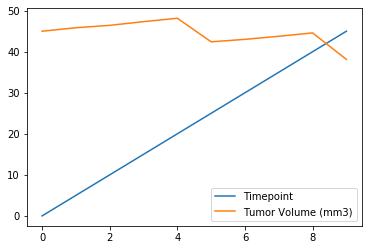

In [20]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
time_vs_tumer = merge_data[merge_data["Mouse ID"].isin(["j119"])]
# time_vs_tumer

time_vs_tumer_data = time_vs_tumer[["Mouse ID", "Timepoint", "Tumor Volume (mm3)"]]
# time_vs_tumer_data

line_plot_df = time_vs_tumer_data.reset_index()
# line_plot_df

line_plot_final = line_plot_df[["Mouse ID", "Timepoint", "Tumor Volume (mm3)"]]
line_plot_final
lines = line_plot_final.plot.line()
tumorvolume_list = line_plot_final['Tumor Volume (mm3)'].tolist()
timepoint_list = line_plot_final['Timepoint'].tolist()

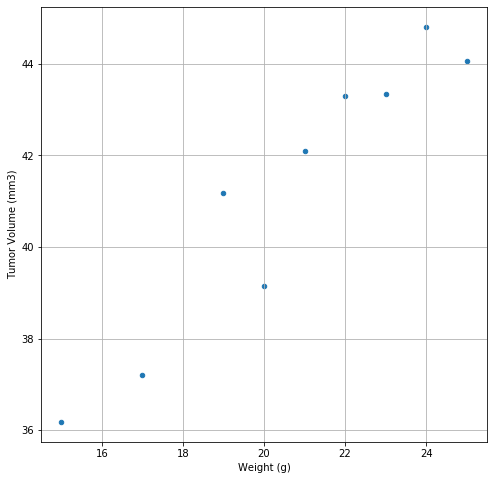

In [21]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
capomulin_scatter = merge_data[merge_data["Drug Regimen"].isin(["Capomulin"])]

capomulin_scatter_df = best_regimens[["Mouse ID","Weight (g)", "Tumor Volume (mm3)"]]

capomulin_scatter_plot = capomulin_scatter.reset_index()

capomulin_sorted = capomulin_scatter_plot.sort_values(["Weight (g)"], ascending = True)

capomulin_grouped_weight = capomulin_scatter_plot.groupby("Weight (g)")["Tumor Volume (mm3)"].mean()

capo_grouped_plot = pd.DataFrame(capomulin_grouped_weight).reset_index()


#capomulin_scatter = capomulin_grouped_weight.plot.scatter(x='Weight (g)', y='Tumor Volume (mm3)')
#
capomulin_scatter = capo_grouped_plot.plot(kind = 'scatter', x = 'Weight (g)', y = 'Tumor Volume (mm3)', grid = True, figsize= (8,8))
#capomulin_scatter

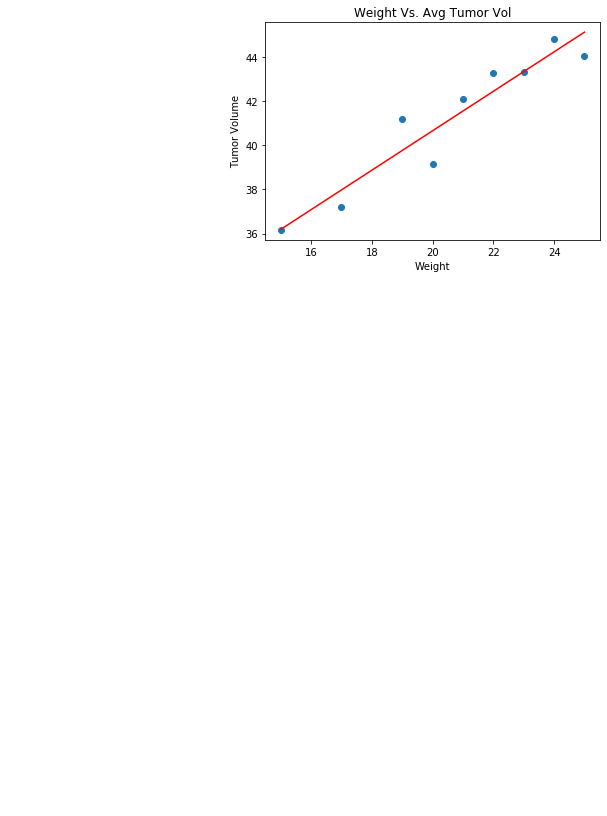

In [22]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen
x_values = capo_grouped_plot["Weight (g)"]
y_values = capo_grouped_plot["Tumor Volume (mm3)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y =" + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (6, 10),fontsize = 10, color = "red")
plt.xlabel("Weight")
plt.ylabel("Tumor Volume")
plt.title("Weight Vs. Avg Tumor Vol")
plt.show()